In [1]:
# Import functions from preprocessing.py
import sys
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Add the path to the src directory
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from model import LSAembed
from preprocessing import clean_text, tokenize_text, remove_stopwords, lemmatize_tokens, preprocess_text
from utils import load_dataset, prepare_data
from evaluate import evaluate

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sayantanchoudhury/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sayantanchoudhury/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sayantanchoudhury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sayantanchoudhury/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from sklearn.linear_model import LogisticRegression

In [16]:


model = LogisticRegression(max_iter=500)

# set the max feature
max_feature_list = [100, 500, 1000, 1500, 2000]

train_accuracy, test_accuracy = [], []
train_roc_auc, test_roc_auc = [], []

for max_feature in max_feature_list:
    # set the tfidf vactorizer
    vectorizer = TfidfVectorizer(tokenizer= None,
                                preprocessor=None,
                                max_features=max_feature)

    # fit and transform the training, test data
    X_train = vectorizer.fit_transform(text_train)
    X_test = vectorizer.transform(text_test)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get the accuracy
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
    
    # # get the f1 score
    # y_train_pred = model.predict(X_train)
    # y_test_pred = model.predict(X_test)

    # train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    # test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # print(train_f1, test_f1)
    
    # get the roc auc score
    Pr_train = model.predict_proba(X_train)
    Pr_test = model.predict_proba(X_test)
    train_roc_auc.append(roc_auc_score(y_train, Pr_train, multi_class='ovo'))
    test_roc_auc.append(roc_auc_score(y_test, Pr_test, multi_class='ovo'))

In [ ]:
train_svd_accuracy, test_svd_accuracy = [], []
train_svd_roc_auc, test_svd_roc_auc = [], []

# set the tfidf vactorizer
vectorizer = TfidfVectorizer(tokenizer= None,
                            preprocessor=None,
                            max_features=max_feature_list[-1])

# fit and transform the training, test data
X_train = vectorizer.fit_transform(text_train)
X_test = vectorizer.transform(text_test)

for max_feature in max_feature_list:
    # # set the svd
    # svd = TruncatedSVD(n_components=max_feature)
    
    # # transform the data
    # Z_train = svd.fit_transform(X_train)
    # Z_test = svd.transform(X_test)
    
    # set the lsa embedder
    model = LSAembed(model_name='LogisticRegression', n_components=max_feature)
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get the accuracy
    train_svd_accuracy.append(model.score(X_train, y_train))
    test_svd_accuracy.append(model.score(X_test, y_test))
    
    # get the roc auc score
    Pr_train = model.predict_proba(X_train)
    Pr_test = model.predict_proba(X_test)
    train_svd_roc_auc.append(roc_auc_score(y_train, Pr_train, multi_class='ovo'))
    test_svd_roc_auc.append(roc_auc_score(y_test, Pr_test, multi_class='ovo'))

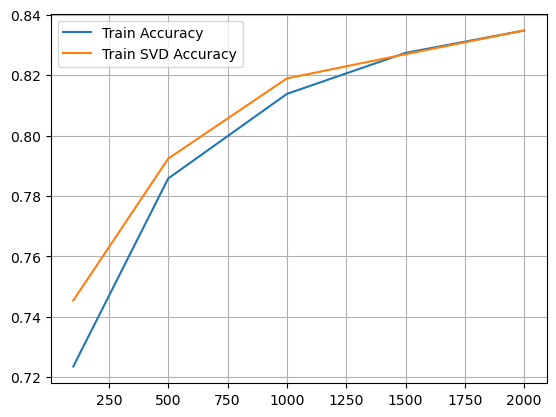

In [ ]:

plt.plot(max_feature_list, train_accuracy, label='Train Accuracy')
plt.plot(max_feature_list, train_svd_accuracy, label='Train SVD Accuracy')
plt.grid()
plt.legend()

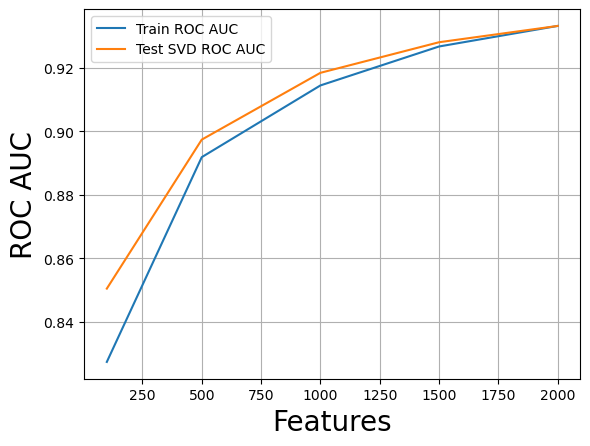

In [ ]:
# plot the roc auc score

plt.plot(max_feature_list, train_roc_auc, label='Train ROC AUC')
plt.plot(max_feature_list, train_svd_roc_auc, label='Test SVD ROC AUC')
plt.grid()
plt.ylabel('ROC AUC', fontsize= 20)
plt.xlabel('Features', fontsize= 20)
plt.legend()